In [1]:
import sqlite3
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls 

 googleplaystore.csv		    GPlayStore.ipynb
 googleplaystore_user_reviews.csv   StudentsPerformance.csv
'GPlayStore for GitHub.ipynb'	   'Students Performance in Exams.ipynb'


In [3]:
S_Performance = pd.read_csv('./StudentsPerformance.csv')
#print(type(S_Performance))
#S_Performance.shape
S_Performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
S_Performance.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [5]:
#S_Performance['math score'].mean()
#S_Performance['reading score'].mean()
S_Performance['writing score'].mean()

68.054

In [6]:
S_Performance['mean score'] = (S_Performance['math score'] + S_Performance['reading score'] + S_Performance['writing score']) / 3
S_Performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [7]:
test_prep_scores = S_Performance[['test preparation course','mean score']].groupby('test preparation course').mean()
test_prep_scores

,mean score
test preparation course,
completed,72.669460
none,65.038941


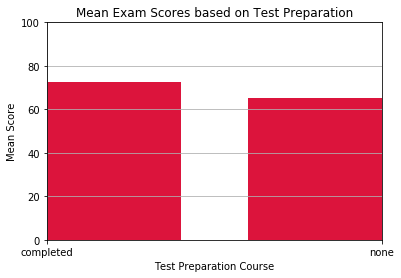

In [8]:
test_prepped = ['completed', 'none']
plt.bar(test_prepped, test_prep_scores['mean score'].values, facecolor = 'crimson')
plt.xlabel('Test Preparation Course')
plt.ylabel('Mean Score')
plt.title('Mean Exam Scores based on Test Preparation')
plt.axis(['completed','none',0,100])
plt.grid(True)

In [9]:
S_Performance.gender.unique()

array(['female', 'male'], dtype=object)

In [10]:
#replace words with numbers for regression analysis
S_Performance['gender'] = S_Performance['gender'].str.replace('female','0')
S_Performance['gender'] = S_Performance['gender'].str.replace('male','1')

In [11]:
S_Performance['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [12]:
S_Performance['race/ethnicity'] = S_Performance['race/ethnicity'].str.replace('group A','0')
S_Performance['race/ethnicity'] = S_Performance['race/ethnicity'].str.replace('group B','1')
S_Performance['race/ethnicity'] = S_Performance['race/ethnicity'].str.replace('group C','2')
S_Performance['race/ethnicity'] = S_Performance['race/ethnicity'].str.replace('group D','3')
S_Performance['race/ethnicity'] = S_Performance['race/ethnicity'].str.replace('group E','4')

In [13]:
S_Performance['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [14]:
S_Performance['parental level of education'] = S_Performance['parental level of education'].str.replace("bachelor's degree",'0')
S_Performance['parental level of education'] = S_Performance['parental level of education'].str.replace("some college",'1')
S_Performance['parental level of education'] = S_Performance['parental level of education'].str.replace("master's degree",'2')
S_Performance['parental level of education'] = S_Performance['parental level of education'].str.replace("associate's degree",'3')
S_Performance['parental level of education'] = S_Performance['parental level of education'].str.replace("some high school",'5')
S_Performance['parental level of education'] = S_Performance['parental level of education'].str.replace("high school",'4')


In [15]:
S_Performance['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [16]:
S_Performance['lunch'] = S_Performance['lunch'].str.replace('standard','0')
S_Performance['lunch'] = S_Performance['lunch'].str.replace('free/reduced','1')

In [17]:
S_Performance['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [18]:
S_Performance['test preparation course'] = S_Performance['test preparation course'].str.replace('none','0')
S_Performance['test preparation course'] = S_Performance['test preparation course'].str.replace('completed','0')

In [19]:
S_Performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,0,1,0,0,0,72,72,74,72.666667
1,0,2,1,0,0,69,90,88,82.333333
2,0,1,2,0,0,90,95,93,92.666667
3,1,0,3,1,0,47,57,44,49.333333
4,1,2,1,0,0,76,78,75,76.333333


In [20]:
S_Performance['mean score'].describe()

count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: mean score, dtype: float64

In [22]:
#get rid of the outliers in this dataset
S_Performance = S_Performance[(S_Performance['mean score'] > 50) & (S_Performance['mean score'] < 80)]


In [23]:
S_Performance['mean score'].describe()

count    693.000000
mean      66.232323
std        8.173617
min       50.333333
25%       59.666667
50%       67.000000
75%       73.000000
max       79.666667
Name: mean score, dtype: float64

# Regression Analysis predicting student's tests scores

In [24]:
S_Performance.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'mean score'],
      dtype='object')

In [25]:
features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']
target = ['mean score']

In [26]:
X = S_Performance[features]
Y = S_Performance[target]

In [27]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,0,1,0,0,0
4,1,2,1,0,0
5,0,1,3,0,0
8,1,3,4,1,0
10,1,2,3,0,0
12,0,1,4,0,0
13,1,0,1,0,0
14,0,0,2,0,0
15,0,2,5,0,0
19,0,2,3,1,0


In [28]:
Y

,mean score
0,72.666667
4,76.333333
5,77.333333
8,65.000000
10,54.666667
12,73.000000
13,73.333333
14,53.666667
15,74.000000
19,57.666667


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=324)

In [30]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
y_prediction = regressor.predict(X_test)
y_prediction

array([[66.59727237],
       [62.7113714 ],
       [63.11474193],
       [63.68316053],
       [62.30800087],
       [65.44211656],
       [68.62664389],
       [67.85654002],
       [65.64380183],
       [67.5873801 ],
       [64.92410958],
       [63.68316053],
       [67.26980281],
       [66.02885376],
       [62.14295279],
       [67.77074677],
       [61.8253755 ],
       [69.59843302],
       [69.80011829],
       [65.64380183],
       [62.7113714 ],
       [62.7113714 ],
       [63.48147527],
       [65.51084679],
       [62.32631946],
       [69.21338109],
       [66.4139057 ],
       [64.55737624],
       [61.92294893],
       [64.53905765],
       [63.76895378],
       [66.3955871 ],
       [66.3955871 ],
       [68.62664389],
       [67.38569484],
       [67.47148808],
       [65.44211656],
       [64.85537936],
       [69.80011829],
       [68.74253591],
       [63.68316053],
       [61.92294893],
       [66.23053903],
       [62.91305666],
       [67.5873801 ],
       [67

In [32]:
print("Min: ", y_prediction.min())
print("Max: ", y_prediction.max())
print("Mean: ",y_prediction.mean())

Min:  61.15284505840816
Max:  70.18517022535772
Mean:  65.93730247879942


In [33]:
Y_test.describe()

,mean score
count,229.000000
mean,66.979622
std,7.796546
min,50.333333
25%,61.333333
50%,67.666667
75%,73.000000
max,79.666667


In [34]:
RMSE = sqrt(mean_squared_error(y_true = Y_test, y_pred = y_prediction))
print(RMSE)

7.640570803039501


### Using Decision Tree Regressor to Check for the Best Model

In [35]:
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [36]:
y_prediction = regressor.predict(X_test)
y_prediction

array([65.8       , 73.5       , 67.77777778, 61.        , 55.66666667,
       61.51851852, 67.45098039, 67.64912281, 66.        , 67.83333333,
       67.16666667, 61.        , 71.25      , 64.95238095, 63.77777778,
       64.41666667, 53.66666667, 73.        , 73.66666667, 66.        ,
       73.5       , 73.5       , 59.        , 75.        , 61.23809524,
       72.33333333, 69.58333333, 62.83333333, 73.        , 65.33333333,
       65.11111111, 70.66666667, 70.66666667, 67.45098039, 76.        ,
       66.76190476, 61.51851852, 61.        , 73.66666667, 69.16666667,
       61.        , 73.        , 72.03333333, 69.25      , 67.83333333,
       67.64912281, 55.22222222, 62.83333333, 61.        , 62.33333333,
       67.83333333, 73.91666667, 65.33333333, 67.20833333, 73.91666667,
       75.83333333, 65.8       , 59.83333333, 62.83333333, 62.33333333,
       67.16666667, 67.64912281, 63.22222222, 64.33333333, 64.80952381,
       57.91666667, 67.44444444, 67.83333333, 66.76190476, 68.18

In [37]:
print("Min: ", y_prediction.min())
print("Max: ", y_prediction.max())
print("Mean: ",y_prediction.mean())

Min:  50.666666666666664
Max:  77.16666666666666
Mean:  66.3296957194807


In [38]:
Y_test.describe()

,mean score
count,229.000000
mean,66.979622
std,7.796546
min,50.333333
25%,61.333333
50%,67.666667
75%,73.000000
max,79.666667


In [39]:
RMSE = sqrt(mean_squared_error(y_true = Y_test, y_pred = y_prediction))
print(RMSE)

9.420410873096763


# Conclusion

Even though the RMSE on both models were higher than expected, these basic models seemed to be quite accurate compared to the original values. But, the best model of the two would be the linear regression model as it held a lower RMSE value. This model could be a little innacurate since there are more factors than the ones in this dataset that would show a student's performance in exams. The data here is also a little shakey as I do not know if the exams taken by each participant took the same test or not. However, this dataset was helpful in determining whether a regression model could be used to predict test scores.